In [58]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem



Formula:  H2O


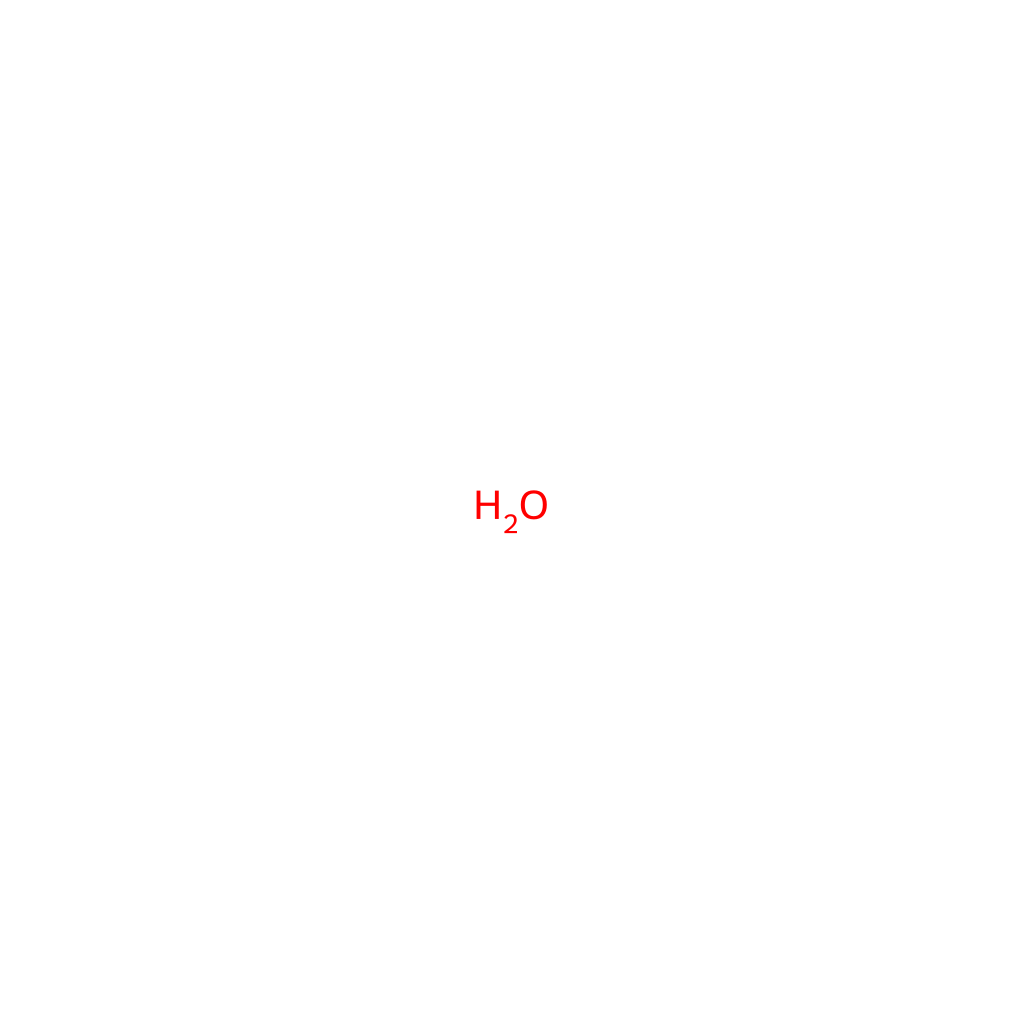

In [59]:
# ASK MOLECULE INPUT
# Ex : CC1=CC=CO1 || Cc1ccco1
INPUT_MOL = Chem.MolFromSmiles(input("Enter SMILES: "))

# WRITE FORMULA
formula = Chem.rdMolDescriptors.CalcMolFormula(INPUT_MOL)
print("Formula: ", formula)

Draw.MolToImage(INPUT_MOL, size=(1024, 1024))

Formula:  C28H38N6O6


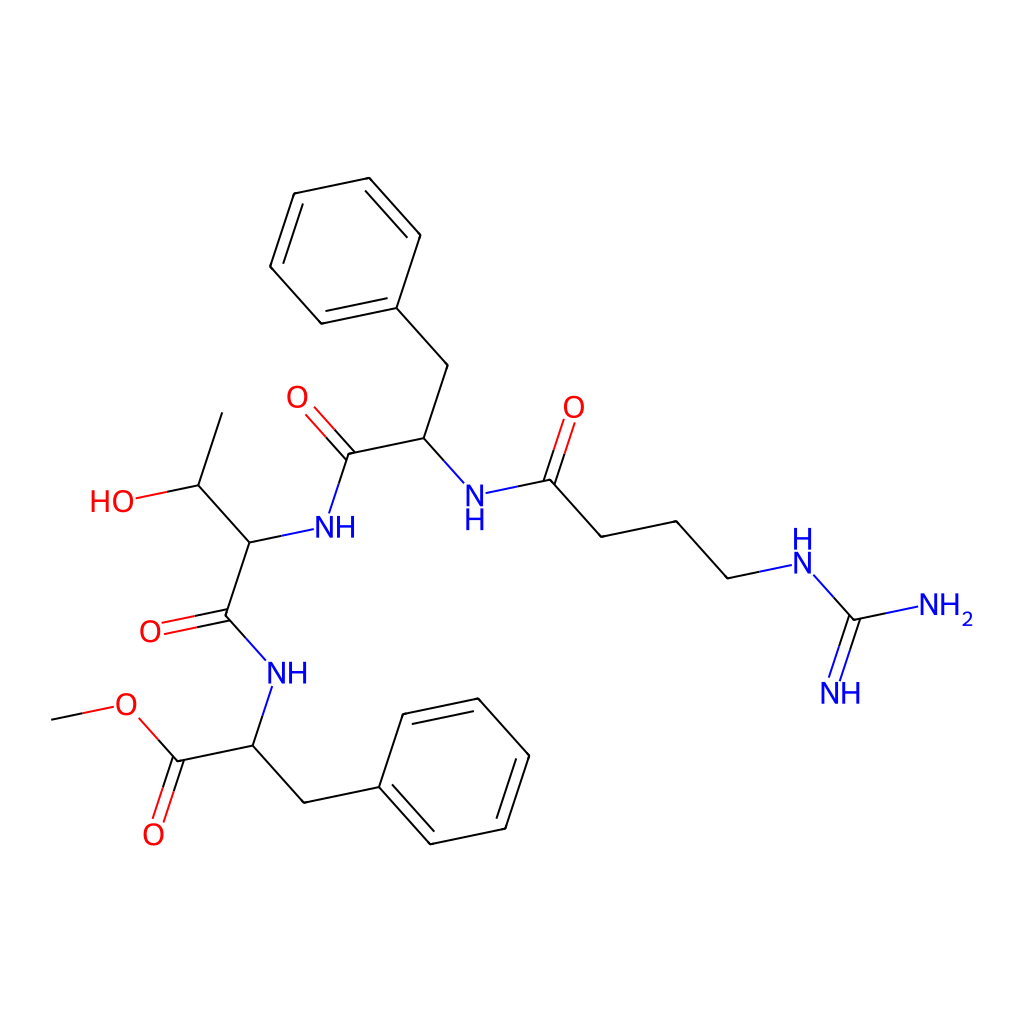

In [52]:
m = Chem.MolFromSmiles('CC(C(C(=O)NC(Cc1ccccc1)C(=O)OC)NC(=O)C(Cc2ccccc2)NC(=O)CCCNC(=N)N)O')
formula = Chem.rdMolDescriptors.CalcMolFormula(m)
print("Formula: ", formula)
Draw.MolToFile(m, 'molecule.png', size=(1024, 1024))
Draw.MolToImage(m, size=(1024, 1024))

In [57]:
# Smiles To 3D
import py3Dmol

mol = Chem.MolFromSmiles('CC(C(C(=O)NC(Cc1ccccc1)C(=O)OC)NC(=O)C(Cc2ccccc2)NC(=O)CCCNC(=N)N)O')
mol = Chem.AddHs(mol)
AllChem.EmbedMolecule(mol)
AllChem.MMFFOptimizeMolecule(mol, maxIters=200)
mblock = Chem.MolToMolBlock(mol)

view = py3Dmol.view(width=512, height=512)
view.addModel(mblock, 'Molecule')
view.setStyle({'stick': {
    'radius': 0.15,
    'colorscheme': 'whiteCarbon'
    },'sphere': {'scale': 0.25}})
view.zoomTo()
view.show()



You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Formula:  C28H38N6O6
Formula:  C28H38N6O6


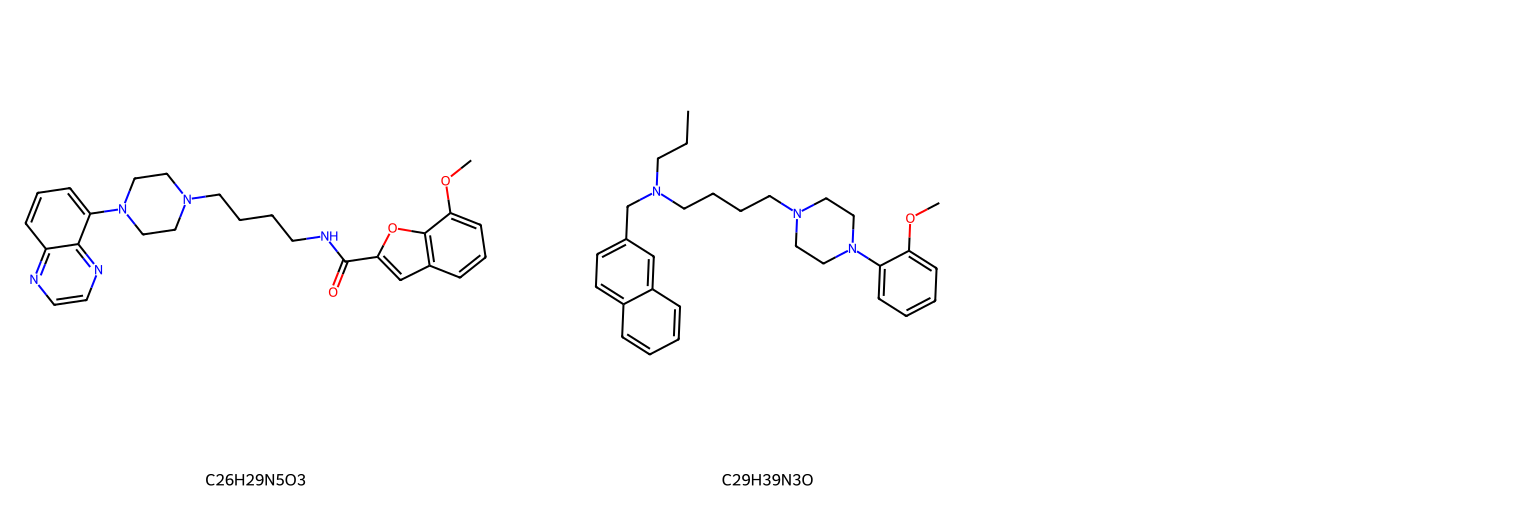

In [46]:
# SIMILARITY MAP :
from rdkit.Chem.Draw import SimilarityMaps

mol = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
refmol = Chem.MolFromSmiles('CCCN(CCCCN1CCN(c2ccccc2OC)CC1)Cc1ccc2ccccc2c1')

# FORMULAS :
formula1 = Chem.rdMolDescriptors.CalcMolFormula(mol)
print("Formula: ", formula)
formula2 = Chem.rdMolDescriptors.CalcMolFormula(refmol)
print("Formula: ", formula)


Draw.MolToFile(mol, 'compareMolecule.png', size=(1024, 1024))
Draw.MolToFile(refmol, 'compareRefMolecule.png', size=(1024, 1024))
Draw.MolsToGridImage(mols=[mol, refmol], legends=[formula1, formula2], subImgSize=(512, 512))


ATOM PAIRS :


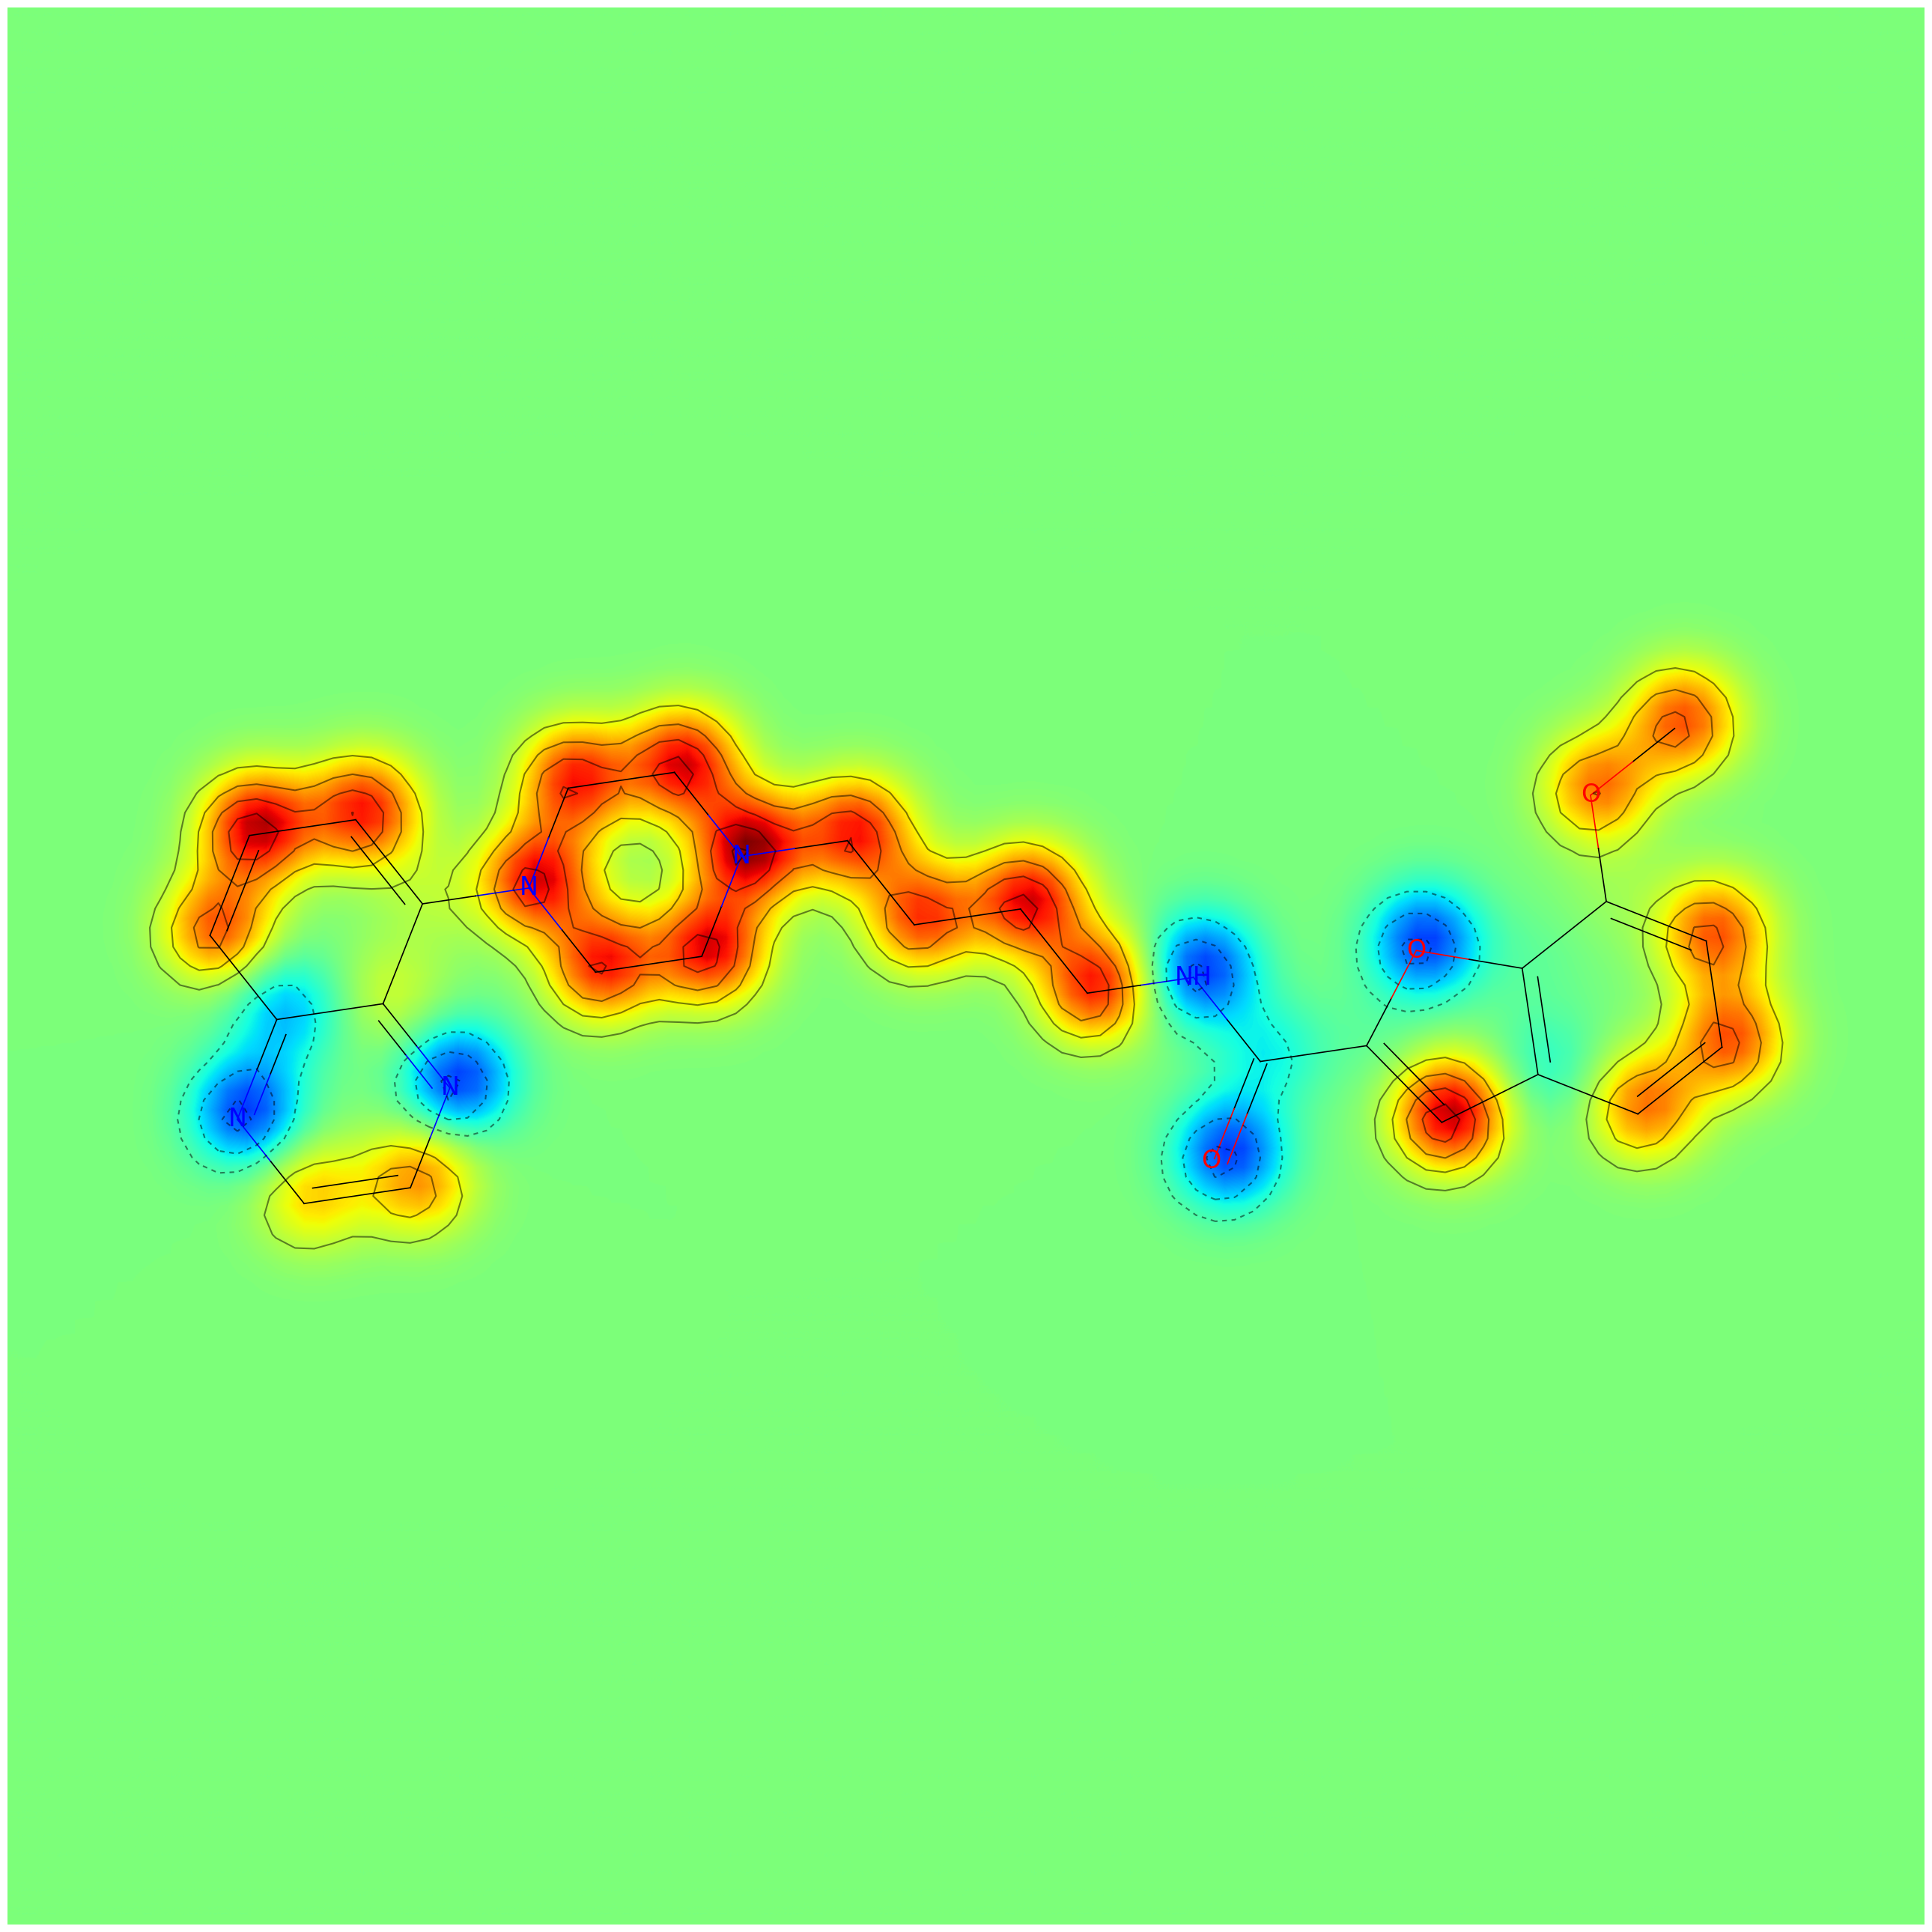

In [47]:
print('ATOM PAIRS :')
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, mol, SimilarityMaps.GetAPFingerprint, size=(1024, 1024), colorMap='jet')

MORGAN FINGERPRINT :


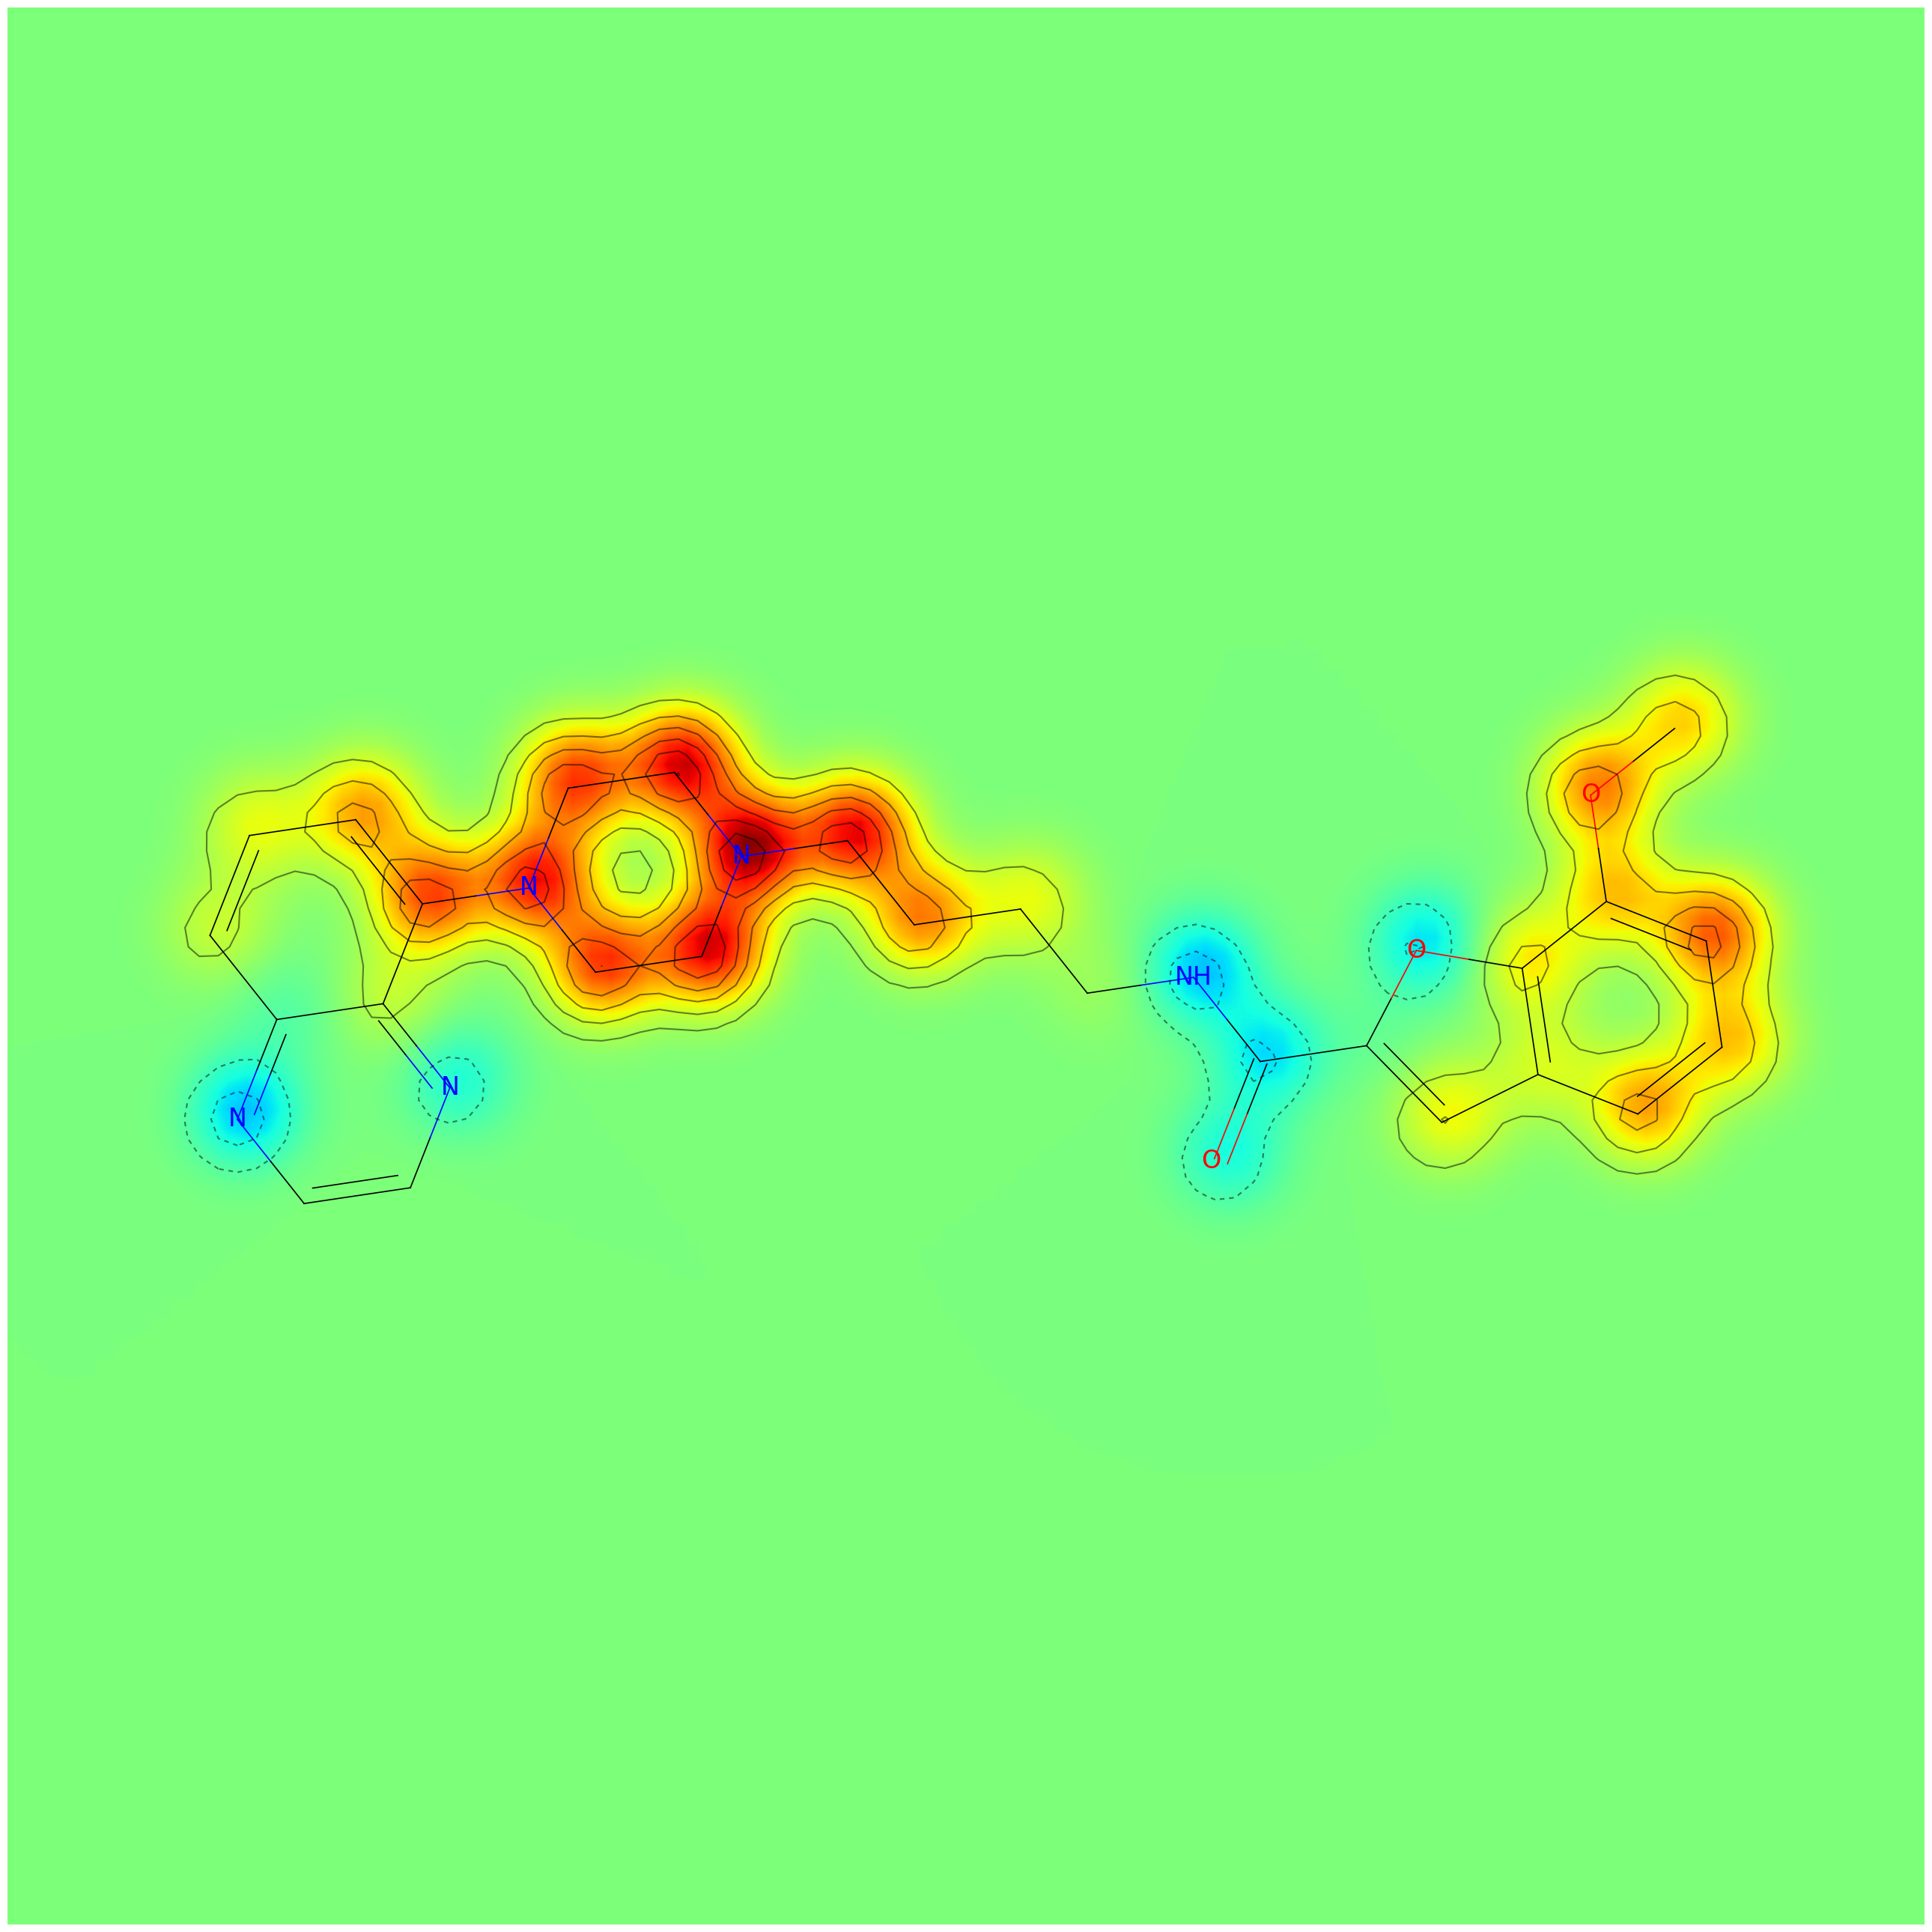

In [48]:
print('MORGAN FINGERPRINT :')
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, mol, SimilarityMaps.GetMorganFingerprint, size=(1024, 1024), colorMap='jet')

TOPOLOGICAL TORSION :


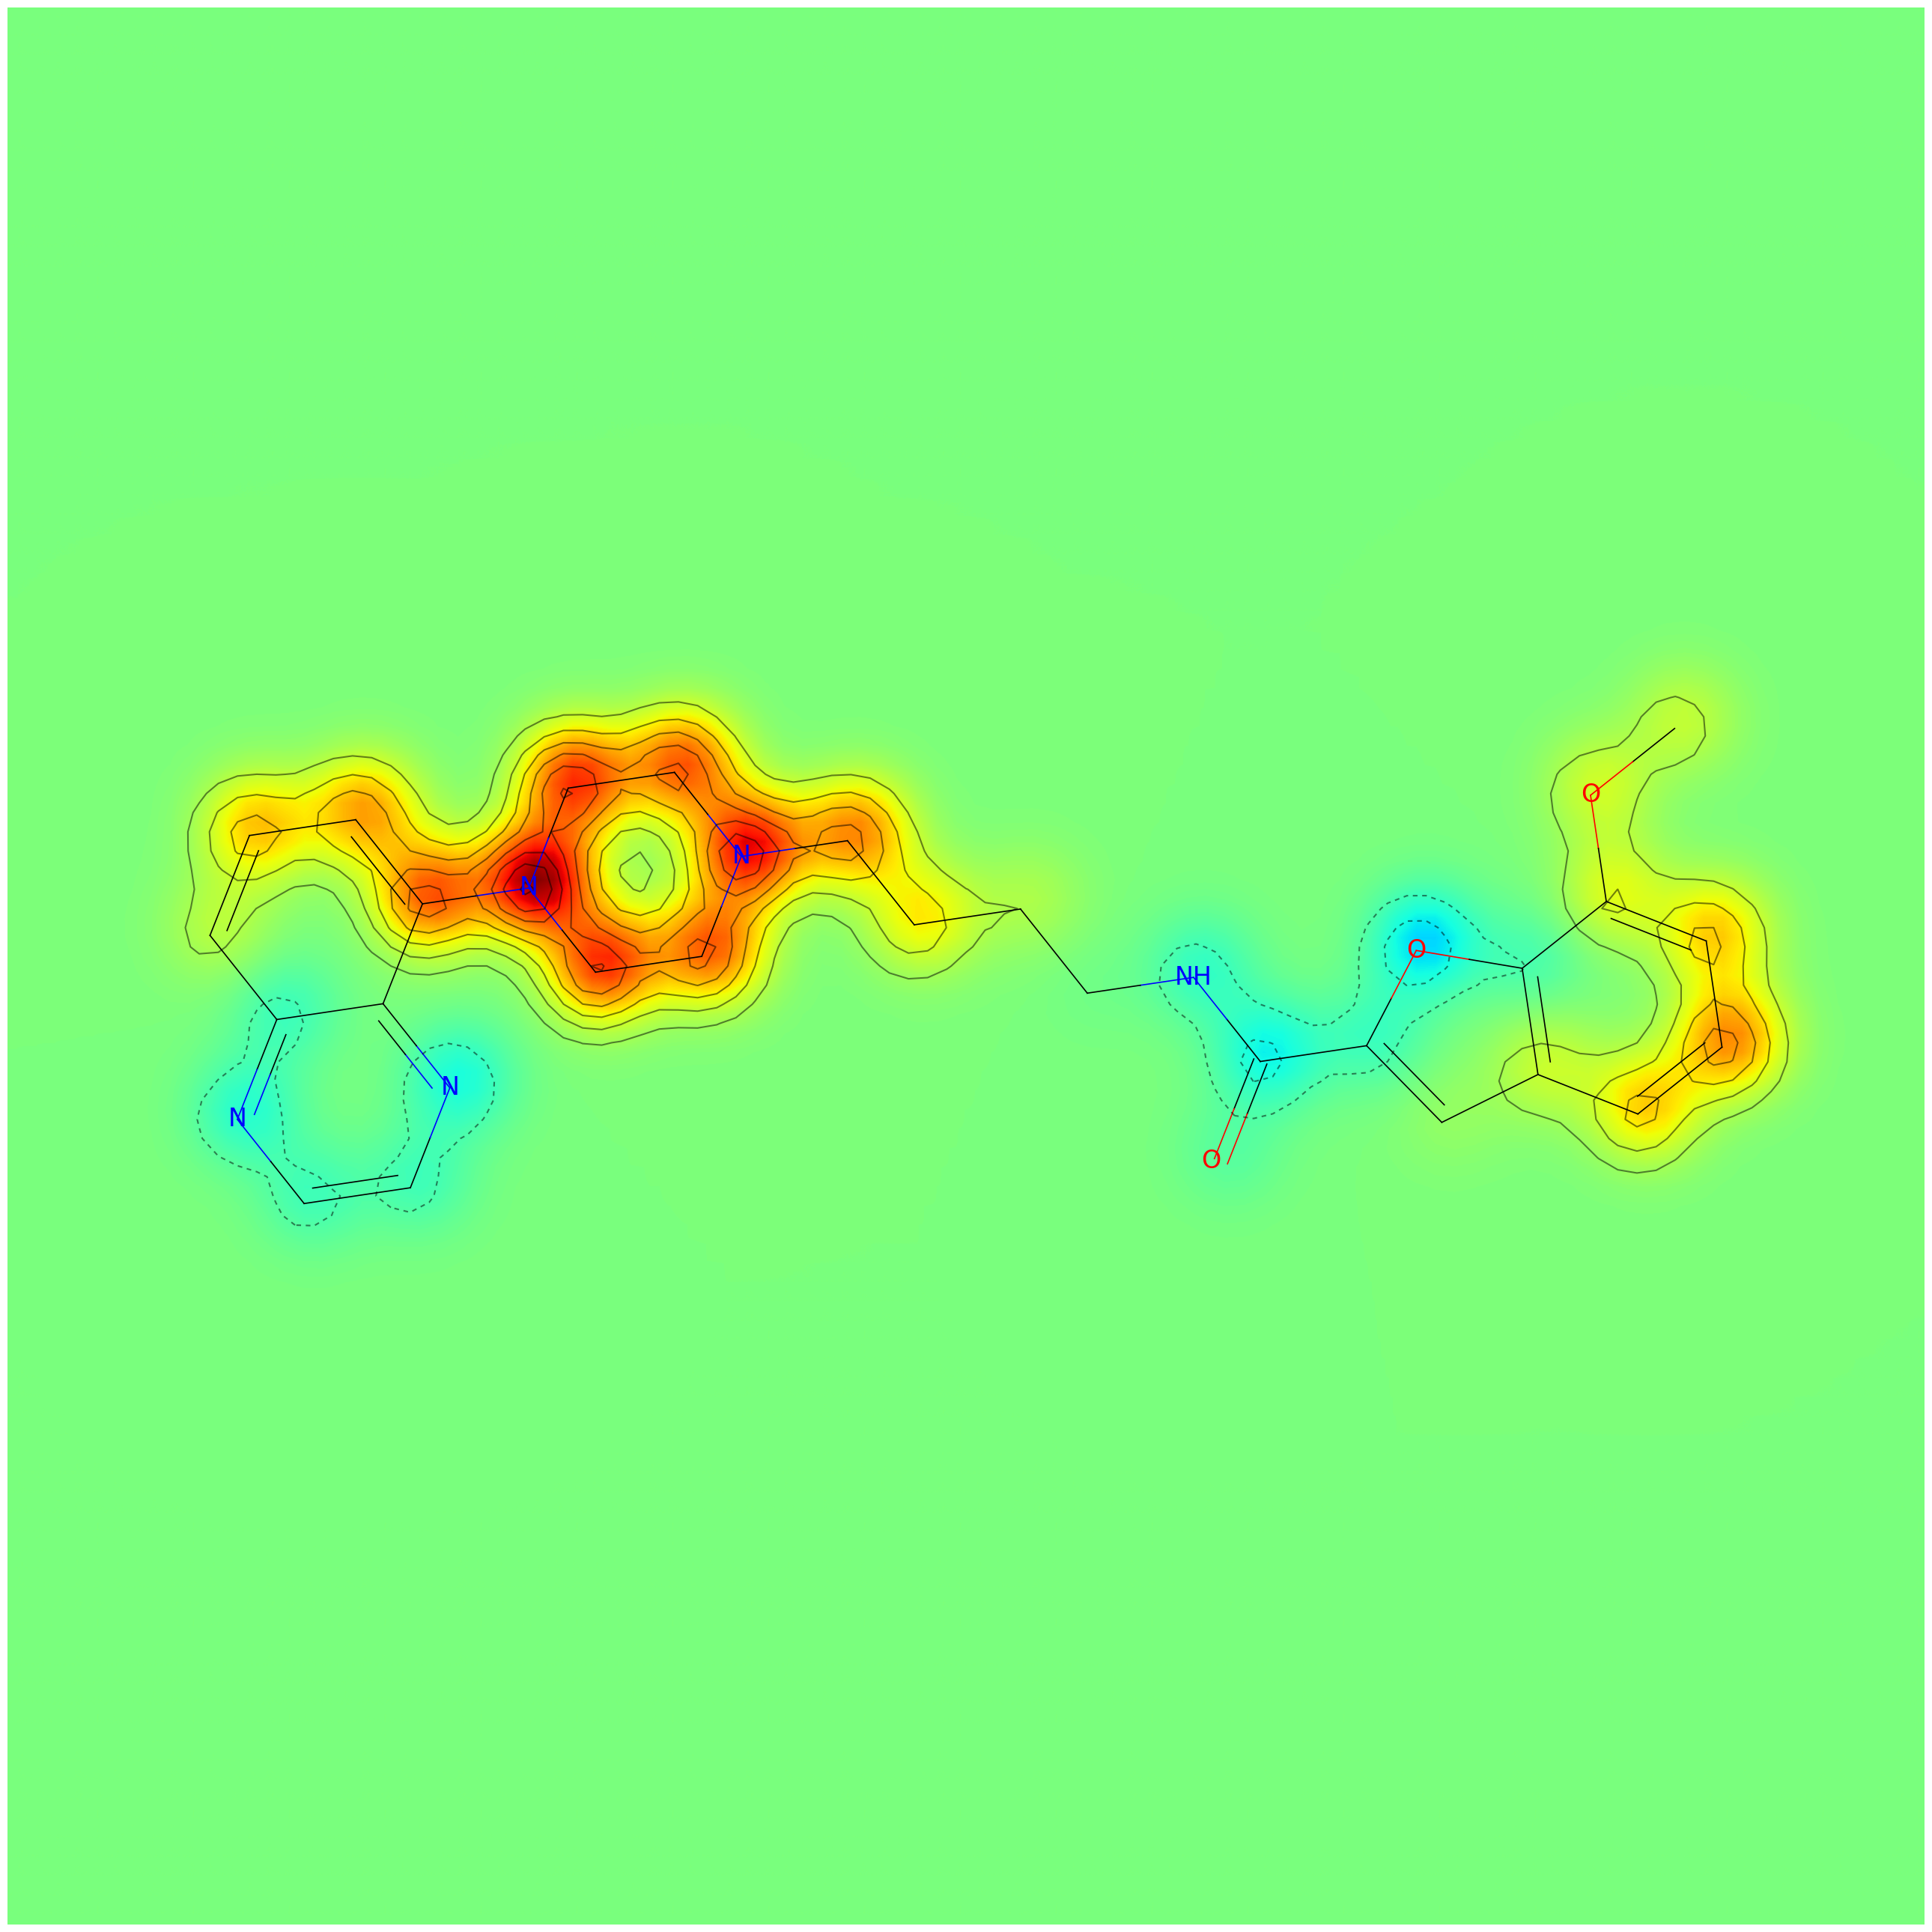

In [49]:
print('TOPOLOGICAL TORSION :')
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, mol, SimilarityMaps.GetTTFingerprint, size=(1024, 1024), colorMap='jet')